# CNN (Convolutional Neural Network)

## Preprocessing Data

### Persiapan Data dan Library

In [ ]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

### Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_anggur='/content/drive/MyDrive/PM4/Kelompok 9/anggur'
path_semangka = '/content/drive/MyDrive/PM4/Kelompok 9/semangka'


In [ ]:
#load data files
anggur_files = os.listdir(path_anggur)
print(anggur_files[0:5])
print(anggur_files[-5:])

semangka_files = os.listdir(path_semangka)
print(semangka_files[0:5])
print(semangka_files[-5:])

['th218.jpg', 'th222.jpg', 'th202.jpg', 'th216.jpg', 'th239.jpg']
['th39.jpg', 'th4.jpg', 'th10.jpg', 'th6.jpg', 'th19.jpg']
['th246.jpg', 'th233.jpg', 'th238.jpg', 'th232.jpg', 'th240.jpg']
['th7.jpg', 'th21.jpg', 'th35.jpg', 'th10.jpg', 'th3.jpg']


In [ ]:
print(f'jumlah gambar anggur : {len(anggur_files)}')
print(f'jumlah gambar semangka : {len(semangka_files)}')

jumlah gambar anggur : 250
jumlah gambar semangka : 250


### Membuat Label pada Data

In [ ]:
anggur_files = [1]*len(anggur_files)
semangka_files = [0]*len(semangka_files)
print(anggur_files[0:5]),print(anggur_files[0:5])
print(len(semangka_files)),print(len(semangka_files))

[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
250
250


(None, None)

In [ ]:
labels = anggur_files + semangka_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

500
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


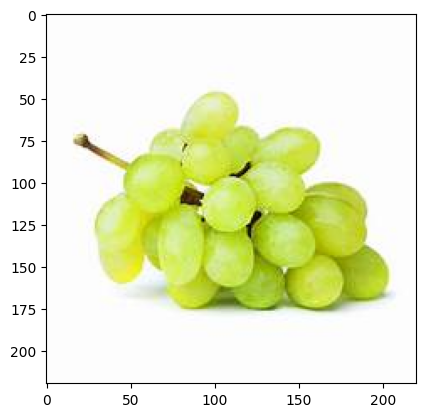

In [ ]:
img = mpimg.imread(path_anggur + '/th19.jpg')
imgplot = plt.imshow(img)
plt.show()

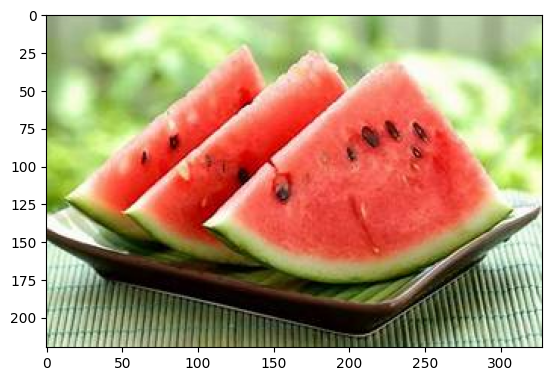

In [ ]:
img = mpimg.imread(path_semangka + '/th90.jpg')
imgplot = plt.imshow(img)
plt.show()

##  Pemrosesan Data

In [ ]:
data = []

In [ ]:
anggur_files = os.listdir(path_anggur)

for img_file in anggur_files:
  image = Image.open(path_anggur + "/" + str(img_file))
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
semangka_files = os.listdir(path_semangka)

for img_file in semangka_files:
  image = Image.open(path_semangka + "/" + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data), len(data)

(list, 500)

In [ ]:
data[0]

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]

In [ ]:
#converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

### Train-test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(500, 128, 128, 3) (400, 128, 128, 3) (100, 128, 128, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(array([[[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],
 
        ...,
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [253, 253, 253]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [253, 253, 253],
  

## CNN


In [ ]:
num_of_classes = 2

model = keras. Sequential()

model.add(keras.layers. Conv2D(32, kernel_size=(3,3), activation ='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense (128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer = 'adam',
              loss="sparse_categorical_crossentropy",
              metrics=['acc'])

In [ ]:
history =  model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
12/12 [==============================] - 12s 832ms/step - loss: 1.0034 - acc: 0.5361 - val_loss: 0.6689 - val_acc: 0.6000
Epoch 2/15
12/12 [==============================] - 12s 933ms/step - loss: 0.6264 - acc: 0.6694 - val_loss: 0.6168 - val_acc: 0.5500
Epoch 3/15
12/12 [==============================] - 12s 994ms/step - loss: 0.6015 - acc: 0.6861 - val_loss: 0.5924 - val_acc: 0.6250
Epoch 4/15
12/12 [==============================] - 10s 757ms/step - loss: 0.5472 - acc: 0.7194 - val_loss: 0.6555 - val_acc: 0.6500
Epoch 5/15
12/12 [==============================] - 12s 1s/step - loss: 0.5359 - acc: 0.7278 - val_loss: 0.6094 - val_acc: 0.6750
Epoch 6/15
12/12 [==============================] - 10s 859ms/step - loss: 0.5464 - acc: 0.7333 - val_loss: 0.5886 - val_acc: 0.6250
Epoch 7/15
12/12 [==============================] - 11s 904ms/step - loss: 0.4631 - acc: 0.8139 - val_loss: 0.7438 - val_acc: 0.6500
Epoch 8/15
12/12 [==============================] - 12s 1s/step - loss: 

### Model Evaluasi

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('test Accuract =', accuracy)

4/4 [==============================] - 1s 151ms/step - loss: 0.2983 - acc: 0.8800
test Accuract = 0.8799999952316284


4/4 [==============================] - 1s 148ms/step - loss: 0.2983 - acc: 0.8800
Test Accuracy, accuracy


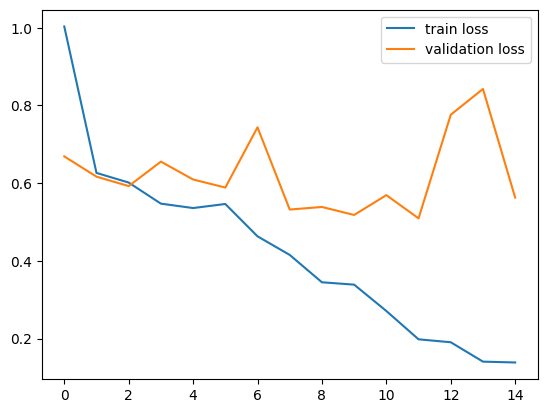

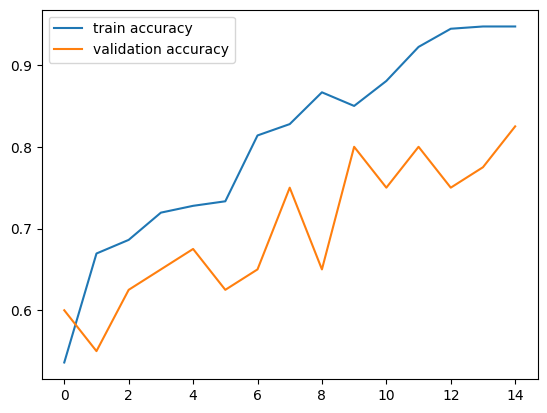

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy, accuracy')

h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history["val_acc"], label='validation accuracy')
plt.legend()
plt.show()

### Sistem Prediksi

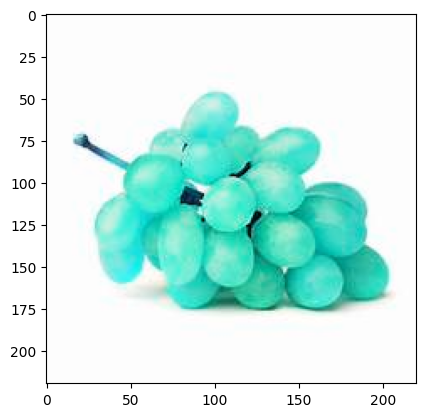

1/1 [==============================] - 0s 52ms/step
[[0.38602135 0.76844865]]
1
Gambar ini menunjukkan anggur


In [ ]:
#input_image_path = input('Path of the image to be predicted: ')
input_image_path = path_anggur + '/th19.jpg'
input_image = cv2.imread(input_image_path)

imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('Gambar ini menunjukkan anggur')
else:
  print('Gambar ini  menunjukkan semangka')

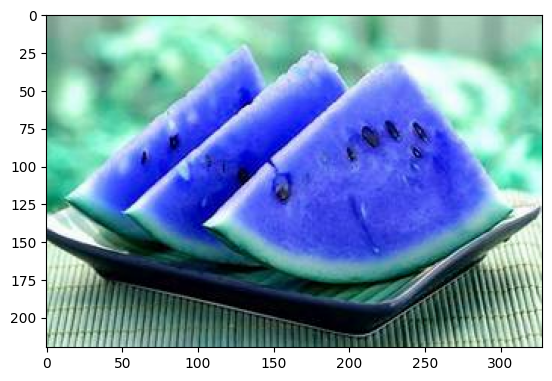

1/1 [==============================] - 0s 49ms/step
[[0.05660728 0.99055666]]
1
Gambar ini menunjukkan semangka


In [ ]:
#input_image_path = input('Path of the image to be predicted: ')
input_image_path = path_semangka + '/th90.jpg'
input_image = cv2.imread(input_image_path)

imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('Gambar ini menunjukkan semangka')
else:
  print('Gambar ini  menunjukkan anggur')

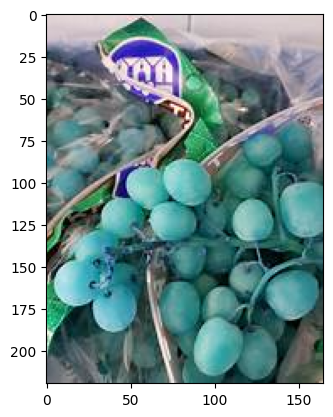

1/1 [==============================] - 0s 63ms/step
[[0.3587299 0.8030878]]
1
Gambar ini menunjukkan anggur


In [ ]:
#input_image_path = input('Path of the image to be predicted: ')
input_image_path = path_anggur + '/th90.jpg'
input_image = cv2.imread(input_image_path)

imgplot = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('Gambar ini menunjukkan anggur')
else:
  print('Gambar ini  menunjukkan semangka')

### Tes Akurasi Model

In [ ]:
import tensorflow_hub as hub

In [ ]:
# URL model MobileNetV2 yang telah dilatih sebelumnya di TensorFlow Hub
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

# Membuat lapisan Keras yang akan digunakan sebagai lapisan pretrained MobileNetV2
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

# Membuat model Sequential menggunakan TensorFlow
model = tf.keras.Sequential([
    # Input layer dengan ukuran gambar 128x128x3
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),

    # Lapisan Lambda untuk meresize gambar ke ukuran yang diterima oleh MobileNetV2
    tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),

    # Lapisan pretrained MobileNetV2
    pretrained_model,

    # Lapisan Dense untuk output dengan jumlah kelas yang sesuai dengan num_of_classes
    tf.keras.layers.Dense(num_of_classes)
])

# Menampilkan ringkasan (summary) dari arsitektur model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy (from_logits=True),
    metrics = ['acc'])


In [ ]:
model.fit(x_train_scaled, y_train, epochs=15)

Epoch 1/15
13/13 [==============================] - 20s 1s/step - loss: 0.4406 - acc: 0.7825
Epoch 2/15
13/13 [==============================] - 15s 1s/step - loss: 0.1867 - acc: 0.9500
Epoch 3/15
13/13 [==============================] - 15s 1s/step - loss: 0.1347 - acc: 0.9575
Epoch 4/15
13/13 [==============================] - 16s 1s/step - loss: 0.1038 - acc: 0.9700
Epoch 5/15
13/13 [==============================] - 16s 1s/step - loss: 0.0979 - acc: 0.9675
Epoch 6/15
13/13 [==============================] - 16s 1s/step - loss: 0.0777 - acc: 0.9850
Epoch 7/15
13/13 [==============================] - 15s 1s/step - loss: 0.0653 - acc: 0.9825
Epoch 8/15
13/13 [==============================] - 14s 1s/step - loss: 0.0517 - acc: 0.9950
Epoch 9/15
13/13 [==============================] - 16s 1s/step - loss: 0.0458 - acc: 0.9950
Epoch 10/15
13/13 [==============================] - 17s 1s/step - loss: 0.0401 - acc: 0.9975
Epoch 11/15
13/13 [==============================] - 16s 1s/step - lo

### Skor Akurasi

In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy ={acc}')

4/4 [==============================] - 6s 1s/step - loss: 0.1179 - acc: 0.9600
Test Loss = 0.11789604276418686
Test Accuracy =0.9599999785423279
